In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
merged_df.columns

Index(['unitid', 'INSTNM', 'FIPS', 'county_name', 'city', 'state', 'zip',
       'latitude', 'longitude', 'date', 'week', 'admission_rate',
       'number_students', 'TotalCount', 'TotalCountWeekly',
       'TotalConfirmedPositive', 'TotalConfirmedPositiveWeekly',
       'TotalPositivityRate', 'TotalPositivityRateWeekly', 'tweet_count',
       'covid_tweet_count', 'sentiment_score', 'likes', 'tweet_replies', 'rt',
       'quotes'],
      dtype='object')

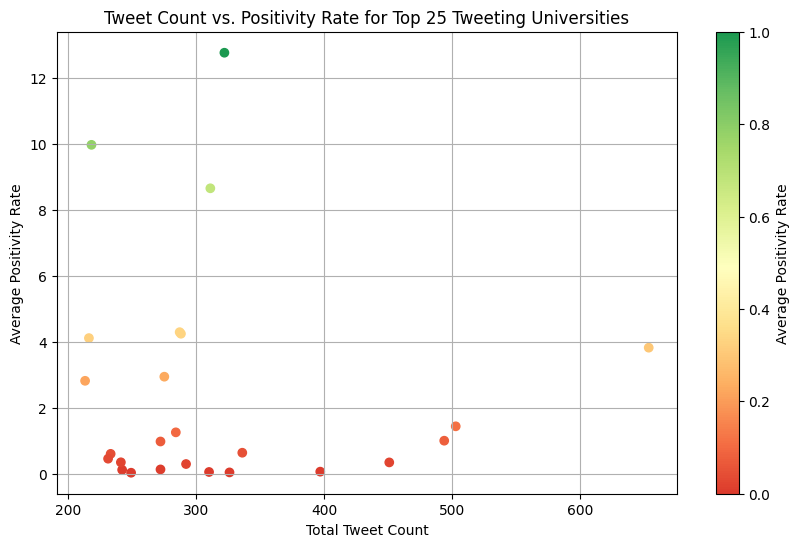

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Load your dataset, assuming 'merged_df' is your DataFrame
# merged_df = pd.read_csv('your_dataset.csv')

# Calculate the average COVID-19 positivity rate per university
university_positivity = merged_df.groupby('INSTNM')['TotalPositivityRate'].mean().reset_index()

# Sort universities by tweet count and get the top 25
top_tweeting_universities = merged_df.groupby('INSTNM')['tweet_count'].sum().reset_index()
top_tweeting_universities = top_tweeting_universities.sort_values(by='tweet_count', ascending=False).head(25)

# Merge positivity rate with tweet count data
top_tweeting_universities = pd.merge(top_tweeting_universities, university_positivity, on='INSTNM')

# Define custom colormap
colors = plt.cm.RdYlGn(np.linspace(0, 1, 256))
new_colors = colors[30:230]  # Removing extreme colors for better visualization
new_cmap = mcolors.ListedColormap(new_colors)

# Normalize positivity rate values for colormap
norm = mcolors.Normalize(vmin=top_tweeting_universities['TotalPositivityRate'].min(),
                         vmax=top_tweeting_universities['TotalPositivityRate'].max())
color_values = norm(top_tweeting_universities['TotalPositivityRate'])

# Plot tweet count vs. positivity rate for top 25 universities
plt.figure(figsize=(10, 6))
scatter = plt.scatter(top_tweeting_universities['tweet_count'],
                      top_tweeting_universities['TotalPositivityRate'],
                      c=color_values, cmap=new_cmap, marker='o')
plt.xlabel('Total Tweet Count')
plt.ylabel('Average Positivity Rate')
plt.title('Tweet Count vs. Positivity Rate for Top 25 Tweeting Universities')
plt.colorbar(scatter, label='Average Positivity Rate')
plt.grid(True)

plt.show()



<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


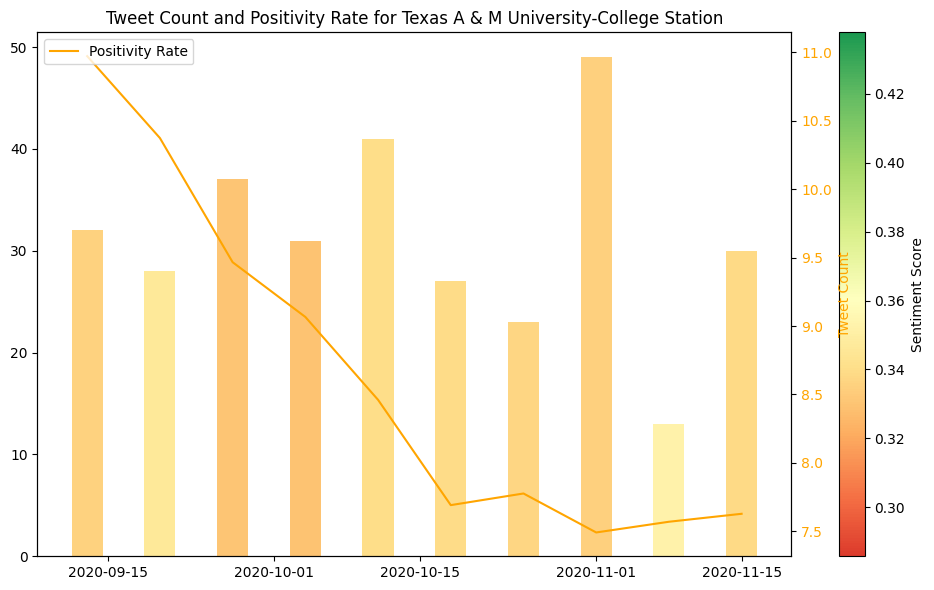

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


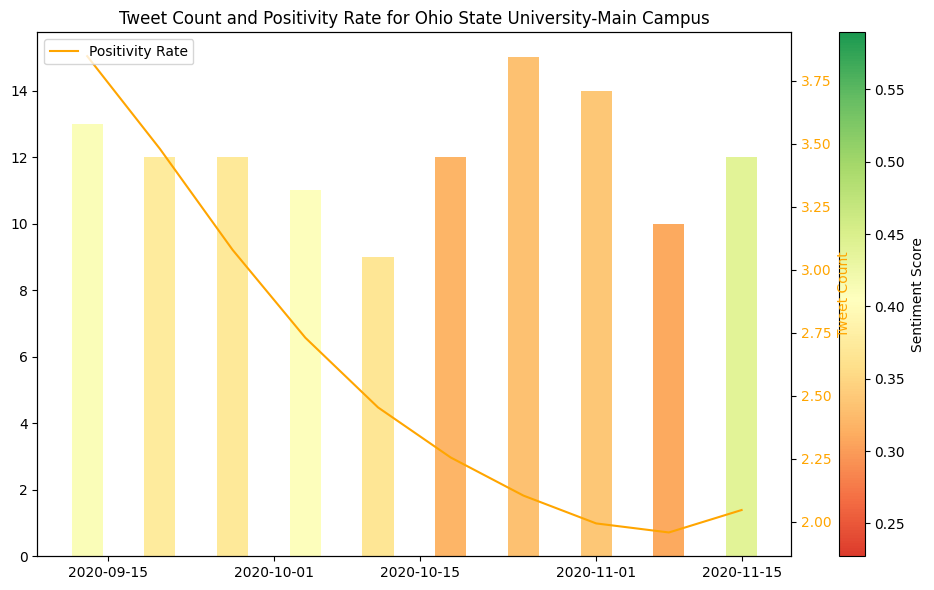

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


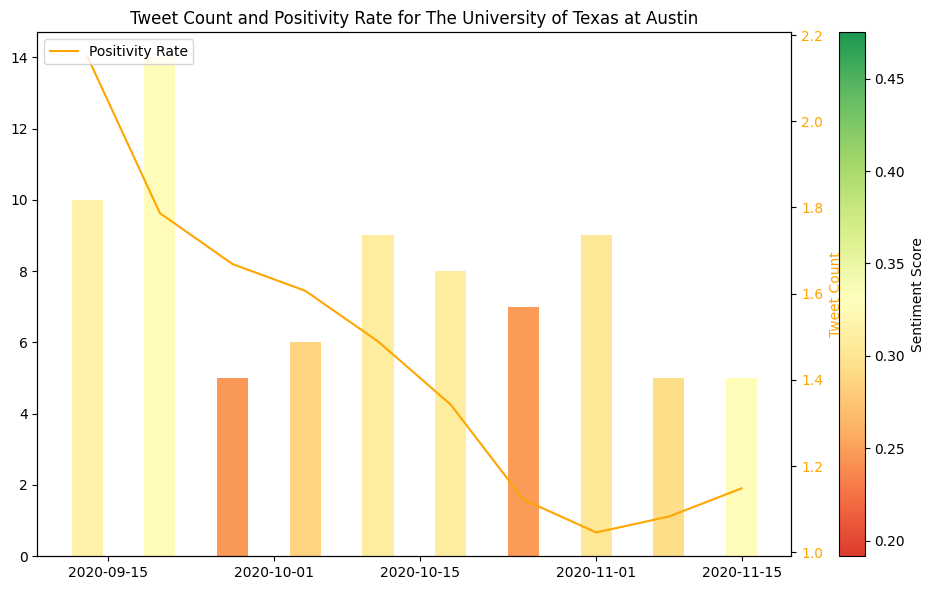

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


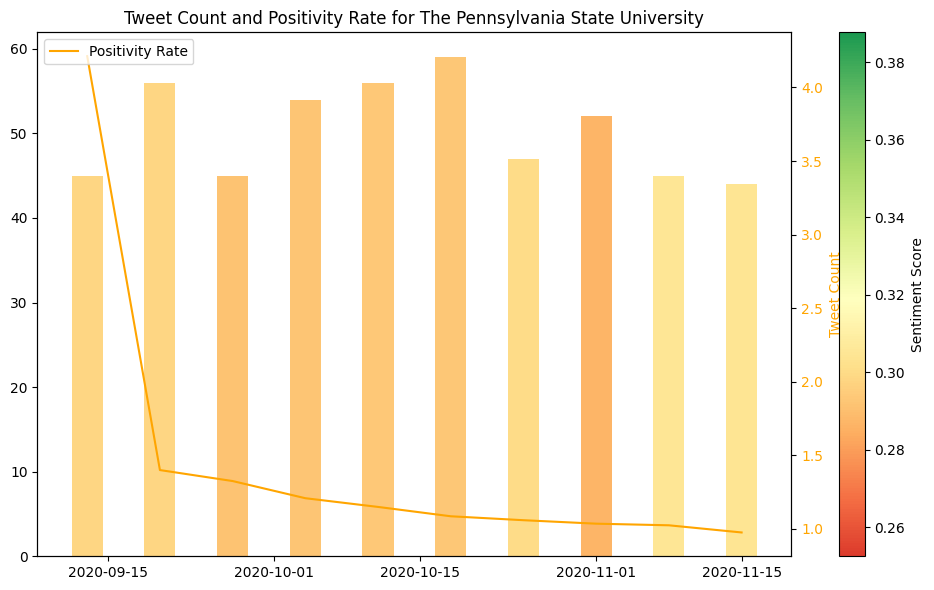

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


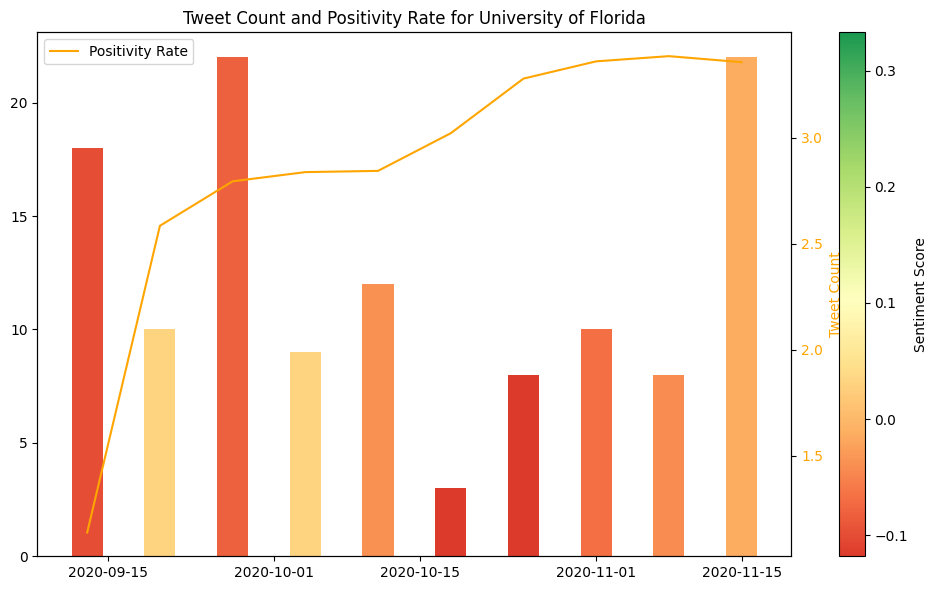

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


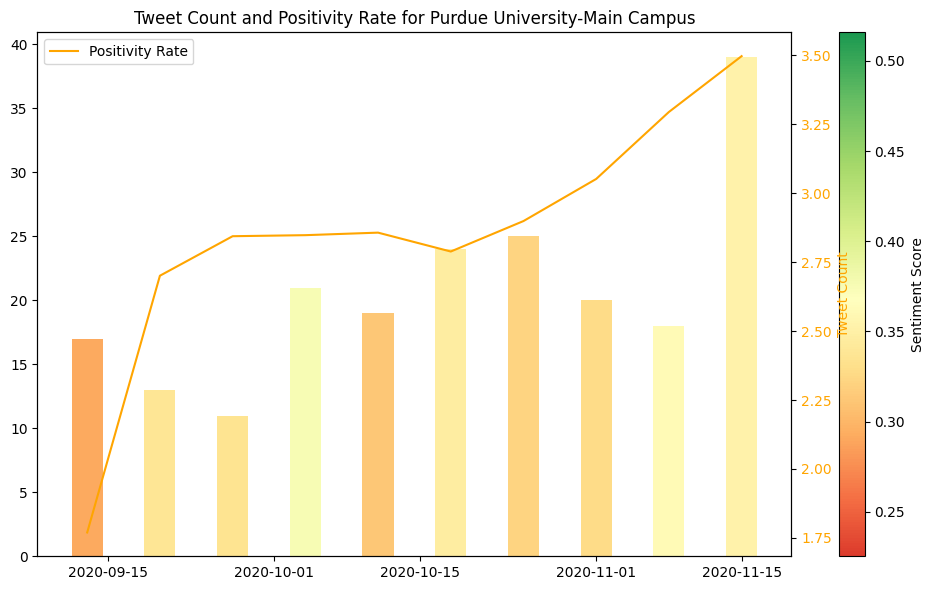

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


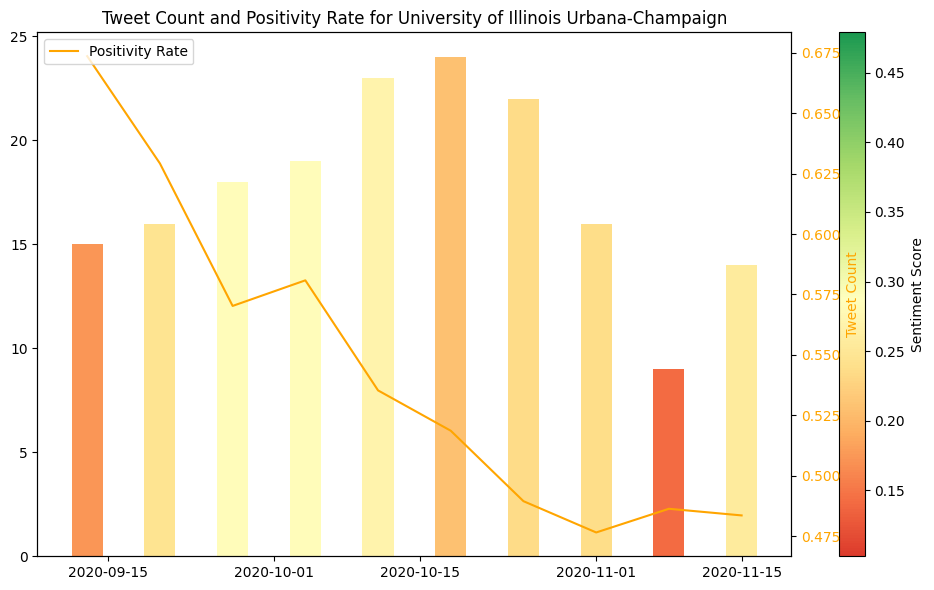

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


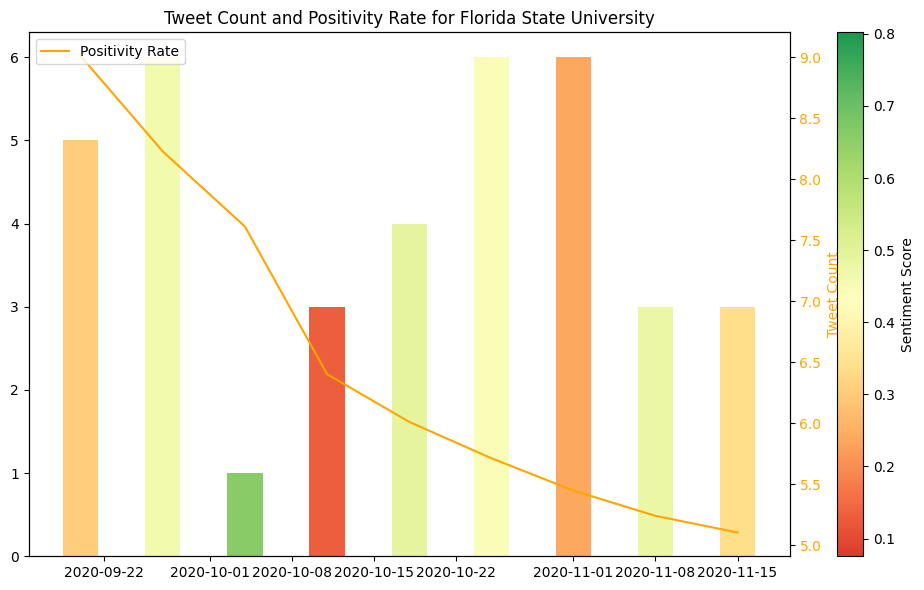

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


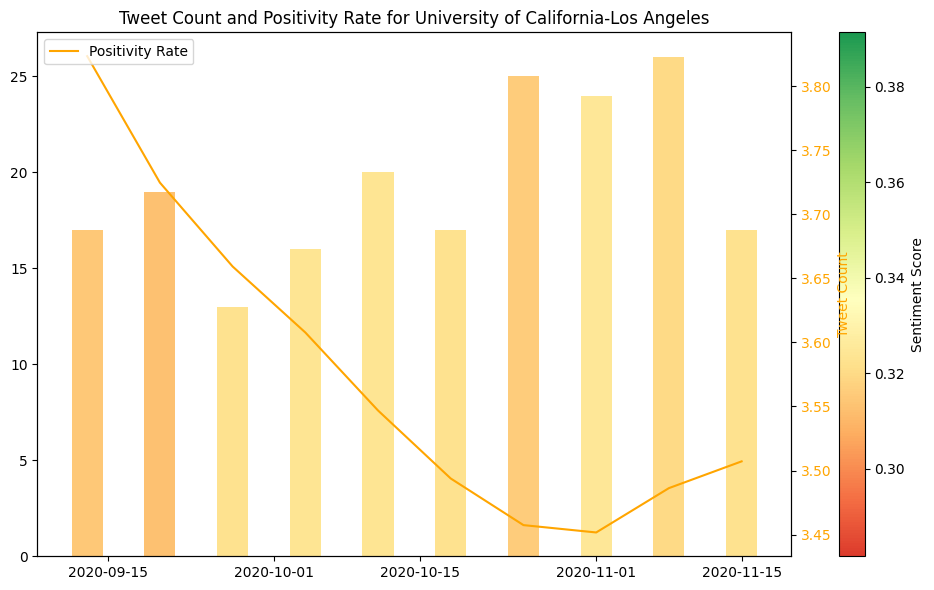

<ipython-input-55-40390bdc9d98>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


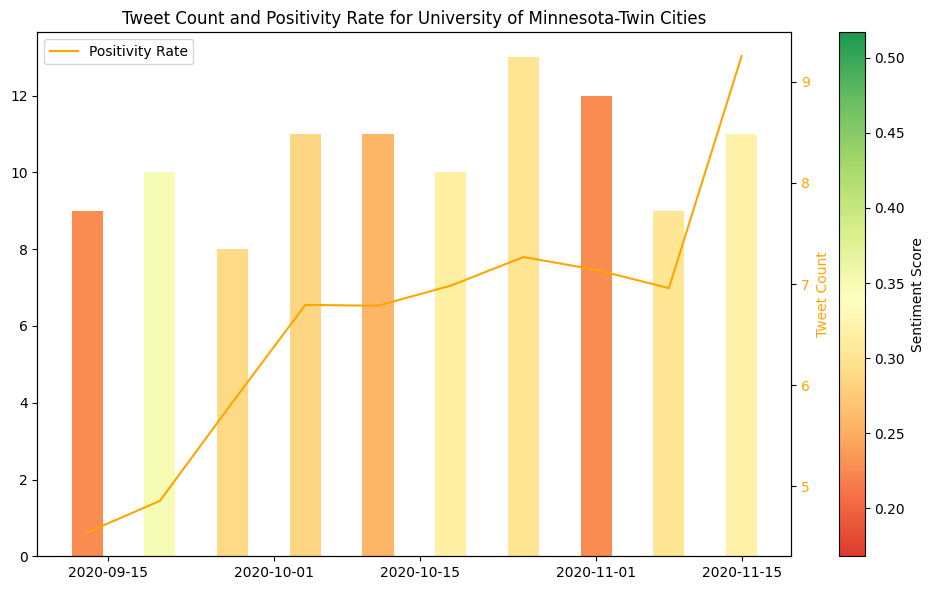

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Convert the 'date' column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Define custom colormap
colors = plt.cm.RdYlGn(np.linspace(0, 1, 256))
new_colors = colors[30:230]  # Removing extreme colors for better visualization
new_cmap = mcolors.ListedColormap(new_colors)

# Select the top 10 universities by enrollment
top_10_universities = merged_df.groupby('INSTNM')['number_students'].max().nlargest(10).index

# Loop through the top 10 universities and create color-coded bar and line graphs
for university in top_10_universities:
    uni_data = merged_df[merged_df['INSTNM'] == university]
    uni_data_grouped = uni_data.groupby('date').agg({'tweet_count': 'sum', 'sentiment_score': 'mean', 'TotalPositivityRate': 'mean'}).reset_index()

    plt.figure(figsize=(10, 6))

    # Plot the bar graph with color-coded bars
    bars = plt.bar(uni_data_grouped['date'], uni_data_grouped['tweet_count'], color=new_cmap(uni_data_grouped['sentiment_score']), width=3)

    # legend
    sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=plt.Normalize(vmin=uni_data_grouped['sentiment_score'].min(), vmax=uni_data_grouped['sentiment_score'].max()))
    sm._A = []  # Avoids error
    cbar = plt.colorbar(sm, orientation='vertical')
    cbar.set_label('Sentiment Score')

    # Create a secondary y-axis for positivity rate
    ax2 = plt.gca().twinx()

    # Plotting positivity rate as a line graph
    ax2.plot(uni_data_grouped['date'], uni_data_grouped['TotalPositivityRate'], color='orange', label='Positivity Rate')
    ax2.set_ylabel('Positivity Rate', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    plt.title(f'Tweet Count and Positivity Rate for {university}')
    plt.xticks(rotation=45)

    # Combine the legend for both plots
    lines, labels = ax2.get_legend_handles_labels()
    plt.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    plt.show()


In [ ]:
# Group data by university and calculate average sentiment score and average positivity rate
university_sentiment_positivity = merged_df.groupby('INSTNM').agg({'sentiment_score': 'mean', 'TotalPositivityRate': 'mean'}).reset_index()

In [ ]:
#total population correlation between sentiment score and covid rates
correlation = university_sentiment_positivity['sentiment_score'].corr(university_sentiment_positivity['TotalPositivityRate'])
print(f"Correlation between Sentiment Score and Positivity Rate: {correlation}")

Correlation between Sentiment Score and Positivity Rate: 0.2749981355055627


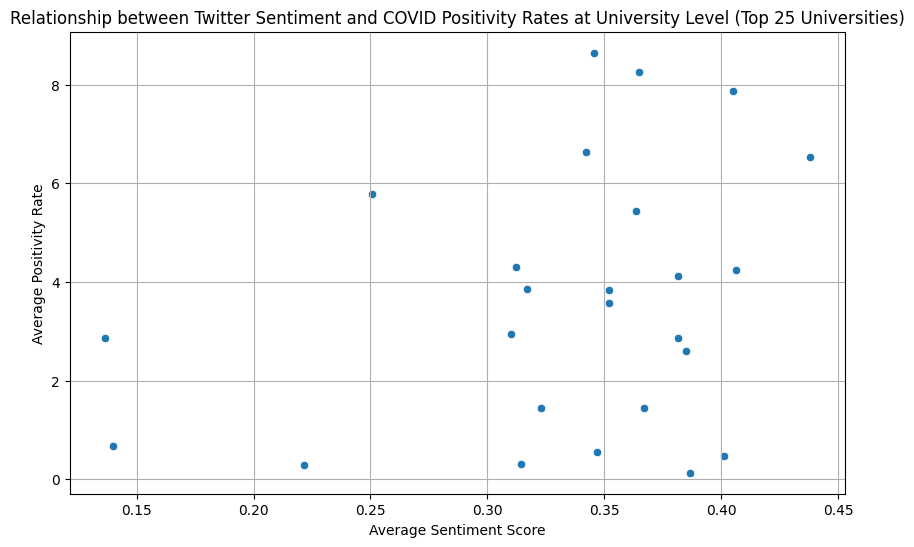

Correlation between Sentiment Score and Positivity Rate: 0.2846109907673698


In [ ]:
# Find the top 25 universities by number of students
top_25_universities = merged_df.groupby('INSTNM')['number_students'].max().nlargest(25).index

# Filter the DataFrame to include only the top 25 universities
top_25_df = merged_df[merged_df['INSTNM'].isin(top_25_universities)]

# Calculate the average sentiment score and average positivity rate for each university
university_sentiment_positivity = top_25_df.groupby('INSTNM').agg({'sentiment_score': 'mean', 'TotalPositivityRate': 'mean'}).reset_index()

# Create a scatter plot to visualize the relationship between sentiment score and positivity rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=university_sentiment_positivity, x='sentiment_score', y='TotalPositivityRate')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average Positivity Rate')
plt.title('Relationship between Twitter Sentiment and COVID Positivity Rates at University Level (Top 25 Universities)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between sentiment score and positivity rate
correlation = university_sentiment_positivity['sentiment_score'].corr(university_sentiment_positivity['TotalPositivityRate'])
print(f"Correlation between Sentiment Score and Positivity Rate: {correlation}")

Modeling done in another book

# Covid Data EDA + Time Series Analysis.ipynb

https://colab.research.google.com/drive/1R0VYcORrdJyOt6b8a6jBlE1zY34JtveK?usp=sharing

# Regression Analysis_Predictive Models.ipynb

https://colab.research.google.com/drive/1qHYKFt-UqntBjClq3PHsK7m0T4Rl19m_?usp=drive_link